In [ ]:
#Name - Anurag Avinash Shevale
#Class - BE Comp I
#Roll No - 20

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/home/admin1/Anurag/diabetes.csv')

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.shape

(768, 9)

<AxesSubplot:>

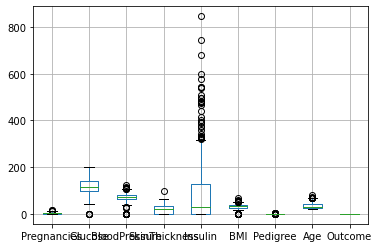

In [8]:
data.boxplot()

In [11]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [12]:
for column in data.columns[1:-3]:
    data[column].replace(0, np.NaN, inplace = True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace = True)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Pedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

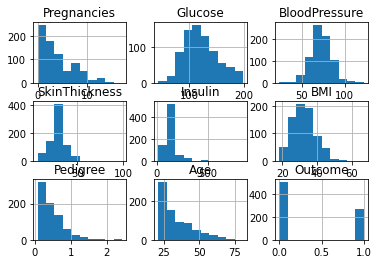

In [16]:
data.hist()

In [17]:
X = data.iloc[:, :8] #Features
Y = data.iloc[:, 8:] #Predictor

In [18]:
#This step performs splitting of data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
#Execution of K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_fit = knn.fit(X_train, Y_train.values.ravel())
knn_pred = knn_fit.predict(X_test)

In [21]:
#We import all metrics that are needed for calculation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [22]:
#After executing this we will get Confusion matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test, knn_pred))

Confusion Matrix
[[88 19]
 [19 28]]


In [23]:
#After executing this we will get the Accuracy Score
print("Accuracy Score:", accuracy_score(Y_test, knn_pred))

Accuracy Score: 0.7532467532467533


In [25]:
#After executing this we will get the Recall Score
print("Recall Score:", recall_score(Y_test, knn_pred))

Recall Score: 0.5957446808510638


In [26]:
#After executing this we will get the F1 Score
print("F1 Score:", f1_score(Y_test, knn_pred))

F1 Score: 0.5957446808510638


In [27]:
#After executing this we will get the Precision Score
print("Precision Score:",precision_score(Y_test, knn_pred))

Precision Score: 0.5957446808510638
